In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("/content/ny-flights.csv")
print(df)

                   fl_date unique_carrier  airline_id tail_num  fl_num origin  \
0      2014-01-01 00:00:00             AA       19805   N338AA       1    JFK   
1      2014-01-01 00:00:00             AA       19805   N335AA       3    JFK   
2      2014-01-01 00:00:00             AA       19805   N327AA      21    JFK   
3      2014-01-01 00:00:00             AA       19805   N3EHAA      29    LGA   
4      2014-01-01 00:00:00             AA       19805   N319AA     117    JFK   
...                    ...            ...         ...      ...     ...    ...   
20812  2014-01-31 00:00:00             UA       19977   N54711    1253    ROC   
20813  2014-01-31 00:00:00             UA       19977   N77525    1429    LGA   
20814  2014-01-31 00:00:00             UA       19977   N37293    1456    LGA   
20815  2014-01-31 00:00:00             UA       19977   N24729    1457    LGA   
20816  2014-01-31 00:00:00             MQ       20398   N609MQ    3699    BUF   

      dest  dep_time  dep_d

**Q1:What is the size of the dataset? (Number of rows and columns)**

In [7]:
df.shape

(20817, 14)

**Q2:Whatare the data types of each column?**

In [8]:
df.dtypes

fl_date            object
unique_carrier     object
airline_id          int64
tail_num           object
fl_num              int64
origin             object
dest               object
dep_time          float64
dep_delay         float64
arr_time          float64
arr_delay         float64
cancelled         float64
arr                object
dep                object
dtype: object

**Q3:Are there any missing values in the dataset? If so, which columns have missing values and how many?**

In [9]:
df.isnull().sum()

fl_date              0
unique_carrier       0
airline_id           0
tail_num           305
fl_num               0
origin               0
dest                 0
dep_time          2355
dep_delay         2355
arr_time          2405
arr_delay         2434
cancelled            0
arr               2405
dep               2355
dtype: int64

**Q4:Whatare the unique values in a categorical column of your choice? How many unique values are there?**

In [10]:
df['tail_num'].unique()

array(['N338AA', 'N335AA', 'N327AA', ..., 'N54711', 'N77525', 'N37293'],
      dtype=object)

**Q5:For a numerical column of your choice, calculate the mean, median, and standard deviation.**

In [11]:
df['dep_delay'].mean()

22.77212653017008

**Q6: Identify any potential outliers in a numerical column of your choice. Explain your approach.**



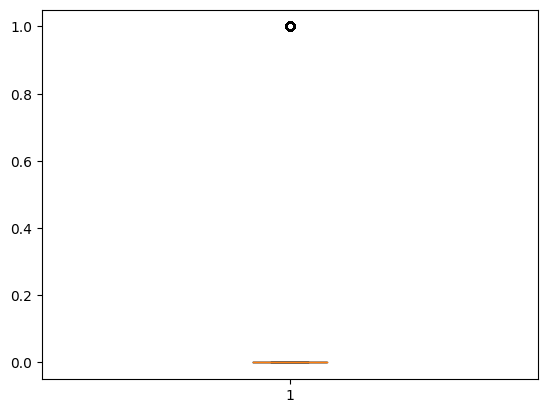

In [16]:
import matplotlib.pyplot as plt

plt.boxplot(df['cancelled'])
plt.show()

**Q8:Groupthe data by a categorical column and compute the aggregate statistics (e.g., mean, sum) for a numerical column**

In [20]:
df.groupby("dep_delay") [["arr_delay"]].mean()

,arr_delay
dep_delay,
-112.0,-112.0
-28.0,26.0
-25.0,-39.0
-23.0,-34.0
-22.0,-28.0
...,...
613.0,630.0
784.0,788.0
837.0,930.0


In [21]:
df.groupby('dep_delay')['arr_delay'].sum()

dep_delay
-112.0   -112.0
-28.0      26.0
-25.0     -39.0
-23.0     -34.0
-22.0     -28.0
          ...  
 613.0    630.0
 784.0    788.0
 837.0    930.0
 881.0    870.0
 973.0    996.0
Name: arr_delay, Length: 439, dtype: float64

**Q9::Based on your analysis, provide a brief summary of any insights or patterns you discovered in the dataset**

In [24]:
df.describe()

,airline_id,fl_num,dep_time,dep_delay,arr_time,arr_delay,cancelled
count,20817.000000,20817.000000,18462.000000,18462.000000,18412.000000,18383.000000,20817.00000
mean,20109.614882,1826.098813,1319.991713,22.772127,1493.698566,21.380732,0.11505
std,370.715209,1548.188325,479.999940,59.766152,518.851657,64.605591,0.31909
min,19393.000000,1.000000,1.000000,-112.000000,1.000000,-112.000000,0.00000
25%,19790.000000,472.000000,858.000000,-4.000000,1110.750000,-12.000000,0.00000
50%,20355.000000,1457.000000,1336.000000,0.000000,1519.000000,3.000000,0.00000
75%,20409.000000,2701.000000,1720.000000,22.000000,1923.000000,28.000000,0.00000
max,21171.000000,6258.000000,2400.000000,973.000000,2400.000000,996.000000,1.00000


**10. Drop the duplicates**

In [25]:
df.drop_duplicates()

,fl_date,unique_carrier,airline_id,tail_num,fl_num,origin,dest,dep_time,dep_delay,arr_time,arr_delay,cancelled,arr,dep
0,2014-01-01 00:00:00,AA,19805,N338AA,1,JFK,LAX,914.0,14.0,1238.0,13.0,0.0,2014-01-01 12:38:00,2014-01-01 09:14:00
1,2014-01-01 00:00:00,AA,19805,N335AA,3,JFK,LAX,1157.0,-3.0,1523.0,13.0,0.0,2014-01-01 15:23:00,2014-01-01 11:57:00
2,2014-01-01 00:00:00,AA,19805,N327AA,21,JFK,LAX,1902.0,2.0,2224.0,9.0,0.0,2014-01-01 22:24:00,2014-01-01 19:02:00
3,2014-01-01 00:00:00,AA,19805,N3EHAA,29,LGA,PBI,722.0,-8.0,1014.0,-26.0,0.0,2014-01-01 10:14:00,2014-01-01 07:22:00
4,2014-01-01 00:00:00,AA,19805,N319AA,117,JFK,LAX,1347.0,2.0,1706.0,1.0,0.0,2014-01-01 17:06:00,2014-01-01 13:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20812,2014-01-31 00:00:00,UA,19977,N54711,1253,ROC,ORD,801.0,-4.0,908.0,4.0,0.0,2014-01-31 09:08:00,2014-01-31 08:01:00
20813,2014-01-31 00:00:00,UA,19977,N77525,1429,LGA,CLE,1522.0,-10.0,1649.0,-31.0,0.0,2014-01-31 16:49:00,2014-01-31 15:22:00
20814,2014-01-31 00:00:00,UA,19977,N37293,1456,LGA,IAH,719.0,-6.0,1006.0,-20.0,0.0,2014-01-31 10:06:00,2014-01-31 07:19:00
20815,2014-01-31 00:00:00,UA,19977,N24729,1457,LGA,IAH,852.0,7.0,1156.0,-6.0,0.0,2014-01-31 11:56:00,2014-01-31 08:52:00
